In [ ]:
import numpy as np
import time
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers , callbacks
from tensorflow.keras.layers.experimental import preprocessing

# Consider plot aesthetics
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'

# **Exercise 1**
The exercise involves training and evaluating fully-connected neural networks on the MNIST handwritten digits dataset. It includes tasks such as rewriting backpropagation equations for specific activation functions, training models with varying number of hidden layers and activation functions, computing maximum gradients for each layer, and comparing the learning curves of models with different activation functions. The aim is to gain insight into the behavior of neural networks and understand the impact of different parameters on their performance.

---
---

# *Part A*
Rewrite the general form of the backpropagation equations given in class
for MLPs 
for the following specific activation functions i) ReLU, ii) hyperbolic
tangent and iii) sigmoid. For each activation function write down the range of
the gradients.

## *The Backpropagation algorithm* 

The backpropagation algorithm consists of three main parts:
1. The forward calculations

In a neural network with $(R)$ layers and a set of $\mu$ patterns, the output of node $i$ in the $(r)$-th hidden layer is denoted as $y^{(r)}_{i\mu}$. This output is calculated by taking the sum of the products of the weights connecting the previous layer nodes to the current node, with the output of the previous layer nodes denoted as $$v^{(r)}_{i\mu} = \sum w^{(r)}_{ij}y^{(r-1)}_{j\mu}$$ The result of this sum is passed as an argument into an activation function $f$. Thus the output of node $i$ in layer $r$ for pattern $\mu$ is:     $$y^{(r)}_{i\mu} = f(v^{(r)}_{i\mu})$$ $w^{(r)}_{ij}$ denotes the weight connecting node $j$ in layer $(r-1)$ to node $(i)$ in layer $(r)$, the bias has been incorporated into the weights vector.
   
   The value of a set cost function $E$ is calculated at the final layer: $(R)$
2. The backward calculations 
To find the $\delta$'s for each hidden layer we begin with finding the $\delta$'s of last layer: $$\delta^{(R)} = f'(v^{(R)}_{i\mu}) \frac{\partial{E}}{\partial{y^{(R)}_{i\mu}}}$$
And move backwards utilizing the known weights and $\delta$'s of each previous layer to calculate the $\delta$'s of each hidden leyer $(r)$: $$\delta^{(r)}_{i\mu} = \sum_k\delta^{(r+1)}_{k\mu}w^{(r+1)}_{ki}f'(v^{(r)}_{i\mu})$$
3. Update of the weights 

Finally, having calculated the partial derivaties of the cost function with respect to all the weights of our network for the $\mu$ patterns, we update the weights: $$w^{(r)}_{ij} = w^{(r)}_{ij} + \delta w^{(r)}_{ij}, \ \text{where} \  \delta w^{(r)}_{ij} = - \epsilon \sum_{\mu}\delta^{(r)}_{i\mu}y^{(r-1)}_{j\mu}$$ 

## *i) ReLU activation function* 
The ReLU activation function, is a piecewise linear fuction. If the input is negative it returns 0, otherwise it returns the input value: 
$$f(v^{(r)}_{i\mu}) = \begin{cases} 0 & \text{if } v^{(r)}_{i\mu} < 0 \\ v^{(r)}_{i\mu} & \text{if } v^{(r)}_{i\mu} > 0 \end{cases}$$



 The derivative of the ReLU function $\displaystyle\frac{d \ max\left(0,v^{(r)}_{i\mu}\right)}{d v^{(r)}_{i\mu}}$, which is 0 for negative inputs and 1 for positive inputs, it is undefined at 0 input values. Thus the gradient of the ReLU activation function is: 
 
$$f'(v^{(r)}_{i\mu}) = \begin{cases} 0 & ,v^{(r)}_{i\mu} < 0 \\ 1 & ,v^{(r)}_{i\mu} > 0 \\ \text{undefined} &  ,v^{(r)}_{i\mu} = 0 \end{cases} $$

Thus, the $\delta$'s when utilizing the ReLU activation function are:
1. For the Final layer:
$$\delta^{(R)} = \begin{cases} \frac{\partial{E}}{\partial{y^{(R)}_{i\mu}}} & ,v^{(R)}_{i\mu} > 0 \\ 0 & ,v^{(R)}_{i\mu} < 0 \\ \text{undefined} &  ,v^{(r)}_{i\mu} = 0 \end{cases}$$ 
2. For the hidden layers:
$$\delta^{(r)}_{i\mu} = \begin{cases} \sum_k\delta^{(r+1)}_{k\mu}w^{(r+1)}_{ki} & ,v^{(r)}_{i\mu} > 0 \\ 0 & ,v^{(r)}_{i\mu} < 0 \\ \text{undefined} &  ,v^{(r)}_{i\mu} = 0 \end{cases}$$

Finally, as shown above the range of its gradients is $[0,1]$.

### Some visual flare

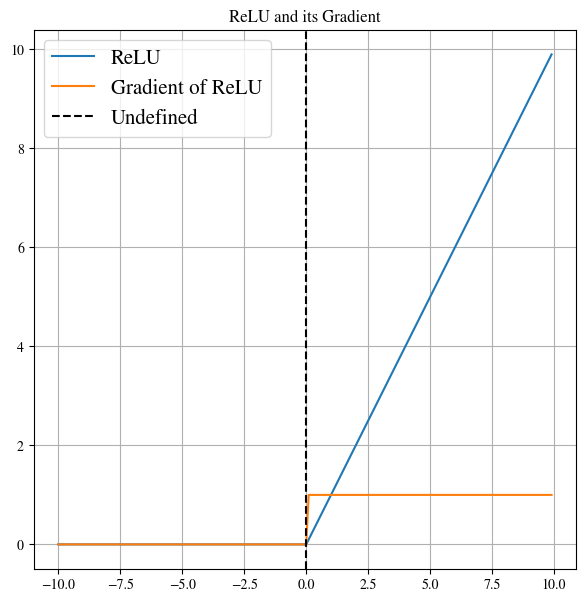

In [ ]:
# Relu function
def ReLU(x):
    return np.maximum(0, x)

# Derivative of Relu function
def dReLU(x):
    return np.where(x<0, 0, 1)
        
plt.figure(figsize = (7, 7))
plt.plot(np.arange(-10, 10, 0.1),
         ReLU(np.arange(-10, 10, 0.1)),
         label="ReLU")
plt.plot(np.arange(-10, 10, 0.1),
         dReLU(np.arange(-10, 10, 0.1)),
         label = "Gradient of ReLU")
plt.axvline(x=0, color = 'k',
            label = 'Undefined',
            linestyle = '--')
plt.title("ReLU and its Gradient")
plt.grid()
plt.legend(fontsize = 15)
plt.show()

## *ii) Hyperbolic-tangent activation function*

The tanh activation function is defined as  
$$    
f(v^{(r)}_{i\mu})=\frac{e^{v^{(r)}_{i\mu}} -e^{-v^{(r)}_{i\mu}}}{e^{v^{(r)}_{i\mu}}+e^{-v^{(r)}_{i\mu}}},
$$

with a derivative of

$$\begin{align}
f'(v^{(r)}_{i\mu}) &= \frac{\left( e^{v^{(r)}_{i\mu}}+ e^{-v^{(r)}_{i\mu}}\right)  \left(e^{v^{(r)}_{i\mu}} + e^{-v^{(r)}_{i\mu}}\right) -\left(e^{v^{(r)}_{i\mu}} - e^{-v^{(r)}_{i\mu}}\right) \left(e^{v^{(r)}_{i\mu}} -e^{-v^{(r)}_{i\mu}}\right)}{\left(e^{v^{(r)}_{i\mu}} + e^{-v^{(r)}_{i\mu}}\right)^2}\\
 &= \frac{ \left(e^{v^{(r)}_{i\mu}} + e^{-v^{(r)}_{i\mu}}\right) ^{2}-\left(e^{v^{(r)}_{i\mu}} - e^{-v^{(r)}_{i\mu}}\right)^2} {\left(e^{v^{(r)}_{i\mu}} + e^{-v^{(r)}_{i\mu}}\right)^2}
\\ 
 &= \left(1 - f(v^{(r)}_{i\mu})^2\right).
\end{align}
$$

Thus, the $\delta$'s when utilising the hyperbolic-tangent activation function are:

1. For the Final layer:

$$
\delta^{(R)} = \frac{\partial{E}}{\partial{y^{(R)}_{i\mu}}} \left(1 - f(v^{(R)}_{i\mu})^{2}\right).
$$ 

2. For the hidden layers:

$$
\delta^{(r)}_{i\mu} = \left(\sum_k\delta^{(r+1)}_{k\mu}w^{(r+1)}_{ki}\right)\left(1 - f(v^{(r)}_{i\mu})^{2}\right).
$$

### Gradient range

### Analytical derivation

As the $tanh(x)$ activation function takes values between (-1, 1) for all real numbers $x$, then $tanh(x)^2$ is always positive and between 
$[0, 1)$. This  means that $tanh'(x) = 1 - tanh(x)^2$ is always between $(0,1]$, therefore, the range of the gradient of $tanh(x)$ is the interval $(0, 1]$.

### Some visual flare

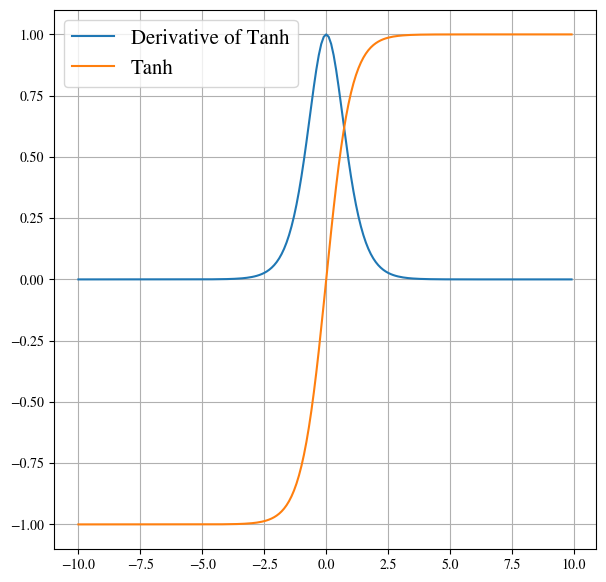

In [ ]:
def hyperbolic_tan_der(x):
    return (1 - np.tanh(x)**2)

plt.figure(figsize = (7, 7))
plt.plot(np.arange(-10,10,0.1),hyperbolic_tan_der(np.arange(-10,10,0.1)),label="Derivative of Tanh")
plt.plot(np.arange(-10,10,0.1),np.tanh(np.arange(-10,10,0.1)),label="Tanh")
plt.grid()
plt.legend(fontsize = 15)
plt.show()

## *iii) Sigmoid activation function*

The sigmoid activation function is defined as

$$
f(v^{(r)}_{i\mu}) = \frac{1}{1 + e^{-v^{(r)}_{i\mu}}},
$$

with a derivative of

$$\begin{align}
f'(v^{(r)}_{i\mu}) &= \frac{0 \times \left(1 + e^{-v^{(r)}_{i\mu}}\right) - 1 \times \left(0 -e^{-v^{(r)}_{i\mu}}\right)}{\left(1 + e^{-v^{(r)}_{i\mu}}\right)^2}\\
 &= \frac{e^{-v^{(r)}_{i\mu}}}{\left(1 + e^{-v^{(r)}_{i\mu}}\right)^2} = f(v^{(r)}_{i\mu})\frac{e^{-v^{(r)}_{i\mu}}}{1 + e^{-v^{(r)}_{i\mu}}}\\
 &= f(v^{(r)}_{i\mu})\frac{1 - 1 + e^{-v^{(r)}_{i\mu}}}{1 + e^{-v^{(r)}_{i\mu}}}\\ 
 &= f(v^{(r)}_{i\mu})\left(1 - f(v^{(r)}_{i\mu})\right).
\end{align}
$$

Thus, the $\delta$'s when utilising the sigmoid activation function are:

1. For the Final layer:

$$
\delta^{(R)} = \frac{\partial{E}}{\partial{y^{(R)}_{i\mu}}} f(v^{(R)}_{i\mu})\left(1 - f(v^{(R)}_{i\mu})\right).
$$ 

2. For the hidden layers:

$$
\delta^{(r)}_{i\mu} = \left(\sum_k\delta^{(r+1)}_{k\mu}w^{(r+1)}_{ki}\right) f(v^{(r)}_{i\mu})\left(1 - f(v^{(r)}_{i\mu})\right).
$$

The sigmoid function has a range of $(0,1)$ and is commonly used in neural networks for its non-linear behavior and smooth gradient. However, it can suffer from vanishing gradients when its input is too large or too small, leading to slower convergence during training.

### Gradient range

#### Analytical derivation
Let $s(x)$ be the sigmoid function, where $$s(x) = \dfrac{1}{1 + e^{-x}}.$$

One can readily verify by straightforward algebra and calculus that $s(x) + s(−x) = 1$ and  $s'(x) = s(x)s(−x)\ .$

But two values which sum to 1 can have a product of at most 0.25 (as the two values must be of the form  $0.5 + \epsilon$ and  $0.5 - \epsilon$, so that their product is $0.25 − \epsilon^2$).

It is also true that $s'(x)$ can never be negative; this would only occur if $s(x)$ and $s(−x)$ ever had opposite signs, but both are always positive.

Therefore, $s'(x) \in [0, 0.25]$.

### Some visual flare

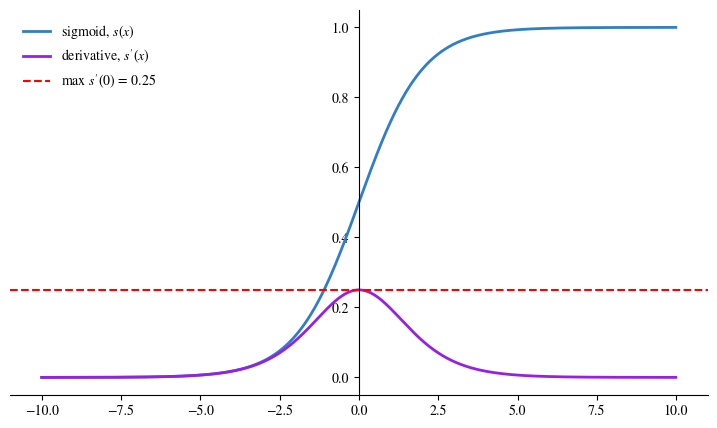

In [ ]:
def sigmoid(x):
    s  = 1 / (1 + np.exp(-x))
    ds = s * (1 - s)  
    return s, ds

x = np.arange(-10, 10, 0.01)
sigmoid(x)

# Find the maximum derivative value
max_ds = np.max(sigmoid(x)[1])

# Setup centered axes
fig, ax = plt.subplots(figsize = (9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create and show plot
ax.plot(x, sigmoid(x)[0],
        color="#307EC7",
        linewidth=2,
        label="sigmoid, $s(x)$")
ax.plot(x, sigmoid(x)[1],
        color="#9621E2",
        linewidth=2,
        label="derivative, $s'(x)$")
ax.axhline(y=max_ds, color='red',
           linestyle='--',
           label=f"max $s'(0)$ = {max_ds:.2f}")

ax.legend(loc = "upper left", frameon = False)
fig.show()

---

# *Part B* 
Download the MNIST data set and use it to train a fully-connected neural network to recognise handwritten digits. The MNIST data set can be loaded from `keras.datasets`. Make sure that your data is normalized. Each hidden layer should have 32 units and the output layer should have a softmax activation function. Compile your model to use the standard SGD optimizer with a learning rate of 0.01 and the categorical crossentropy loss function. Use **(i)** 5, **(ii)** 20 and **(iii)** 40 layers. For each of these scenarios use the **(a)** ReLU, **(b)** hyperbolic tangent and **(c)** sigmoid activation function on all hidden layers. Report the test scores for each model. What are your observations?

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# print the shapes of the training and testing data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Test set % split:",
      round((X_test.shape[0]/X_train.shape[0])*100,2),
      "% of the training set")

11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Test set % split: 16.67 % of the training set


## Data Preprocessing

### Normalization
The range of the pixel brightness values is $[0,255]$, We can limit that range to $[0,1]$ by dividing with $255$:

In [ ]:
print("The maximum value of pixel brightness is:", np.max(X_train))

The maximum value of pixel brightness is: 255


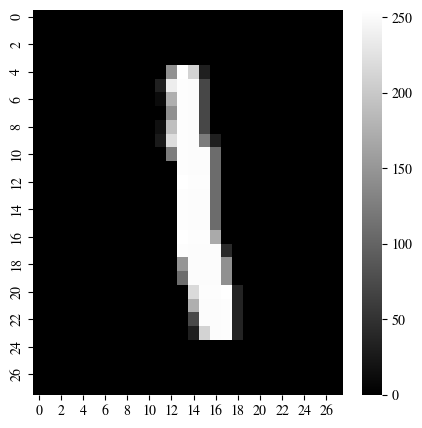

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(X_train[6], cmap=plt.get_cmap('gray'))
plt.show()

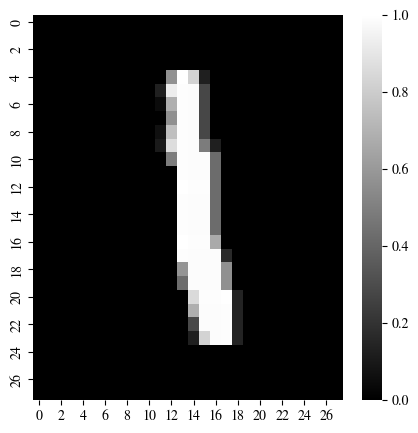

In [ ]:
X_train = X_train/255 
X_test = X_test/255
plt.figure(figsize=(5,5))
sns.heatmap(X_train[6], cmap=plt.get_cmap('gray'))
plt.show()

### Multi label one hot encoding

Considering the targets $y$, there exist a total of ten classes in a multi-label form ranging from $0$ to $9$. We can utilize **Sparse categorical cross entropy**, however to utilize the  **Categorical cross entropy loss function** as instructed, we need to construct a one-hot-representations of the labels.

In [ ]:
print("The shape of the training set is:",y_train.shape)

The shape of the training set is: (60000,)


In [ ]:
from keras.utils import np_utils
class_num = 10
y_train = np_utils.to_categorical(y_train, class_num)
y_test = np_utils.to_categorical(y_test, class_num)
y_train.shape


(60000, 10)

To give the training set patters as input to a Feed Forward Network we need to flatten the pixel coordinates from a 2-D grid: $28 \text{ by } 28$ to a 1-D array: $1 \text{ by } 784$.

In [ ]:
#flattening the pattern cubes into 784 dimensions
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_train_flat.shape

(60000, 784)

## Model creation

The `FFN_maker` function handles the creation of the required Feed Forward Models, specifically:
- It Returns the history of accuracy for every epoch for the train and test set.
- Since we have one-hot encoded labels, as loss function we utilize categorical crossentropy and the fitting categorical accuracy metric.
- We use the test set for validation since this is an example to evalutate the effect of activation functions and not to train a "real" model.
- The model does not contain any dropout, batch normalization or other layers that optimize the model since it serves the purpose of demonstrating the relationship between activation functions and layer depth.

In [ ]:
def FFN_maker(model_name, layer_num, input_shape, activations,epochs, batch_size):
    # Model architecture
    model= keras.Sequential()
    model.add(layers.Dense(32, input_shape = input_shape,
                           activation = activations)
             )
    for i in range(layer_num-2):
        # Hidden layers
        model.add(layers.Dense(32, activation = activations))
        
    model.add(layers.Dense(10, activation='softmax'))
    model._name = model_name
    
    #  Compiling the model
    opt = keras.optimizers.experimental.SGD(learning_rate=0.01)
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics = ['categorical_accuracy']
                 )
    history = model.fit(X_train_flat, y_train,
                        epochs = epochs,
                        batch_size = batch_size,
                        validation_data = (X_test_flat, y_test),
                        verbose = 0
                       )
    return history

### **i)** 5 Layers with *ReLU*, *Sigmoid* and *tanh*

Training-time for relu is: 385.96301341056824 seconds
Training-time for sigmoid is: 327.8494896888733 seconds
Training-time for tanh is: 383.0756833553314 seconds


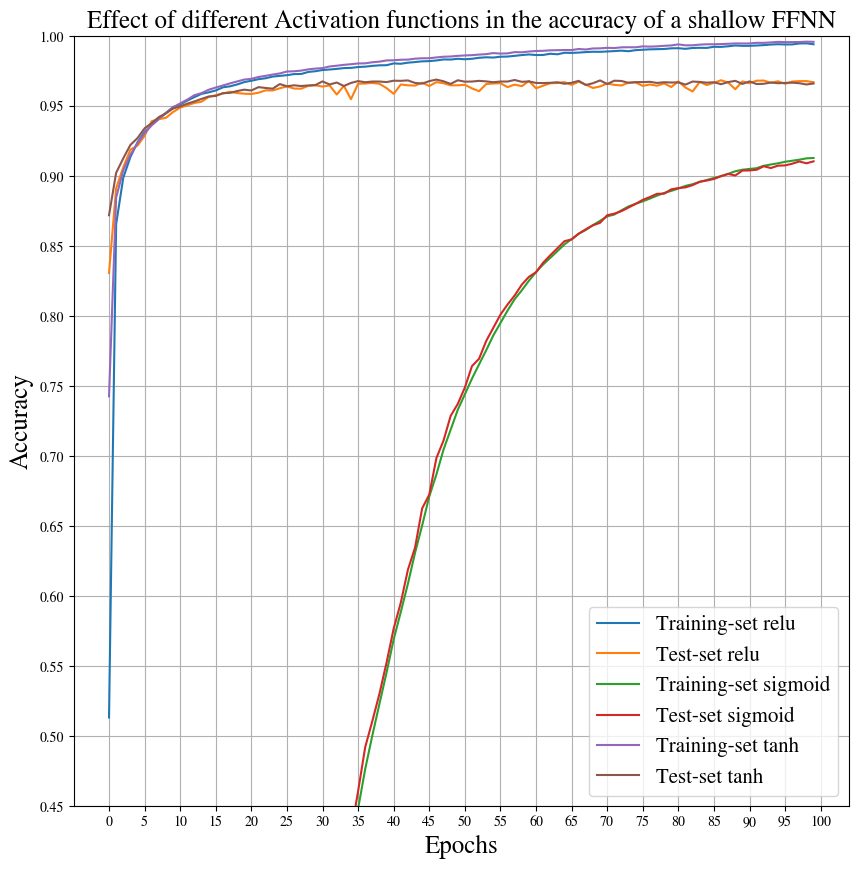

In [ ]:
plt.figure(figsize=(10, 10))
for i in ["relu", "sigmoid", "tanh"]:
    tic = time.time()
    history = FFN_maker("5_layers_"+i, 5, (784,), i, 100, 64)
    toc = time.time()
    print("Training-time for " + i +" is:",toc-tic,"seconds")
    plt.plot(history.history['categorical_accuracy'], label = "Training-set " + i)
    plt.plot(history.history['val_categorical_accuracy'], label = "Test-set " + i)
    plt.xlabel("Epochs",fontsize = 18)
    plt.title("Effect of different Activation functions in the accuracy of a shallow FFNN",fontsize = 18)
    plt.yticks(np.arange(0,1.1,0.05))
    plt.xticks(np.arange(0,105,5))
    plt.ylim([0.45, 1])
    plt.ylabel("Accuracy",fontsize = 18)
    plt.grid()
    plt.legend(fontsize = 15)

### ii) 20 Layers with *ReLU*, *Sigmoid* and *tanh*

Training time for relu is: 568.727588891983 seconds
Training time for sigmoid is: 624.7497429847717 seconds
Training time for tanh is: 624.3137834072113 seconds


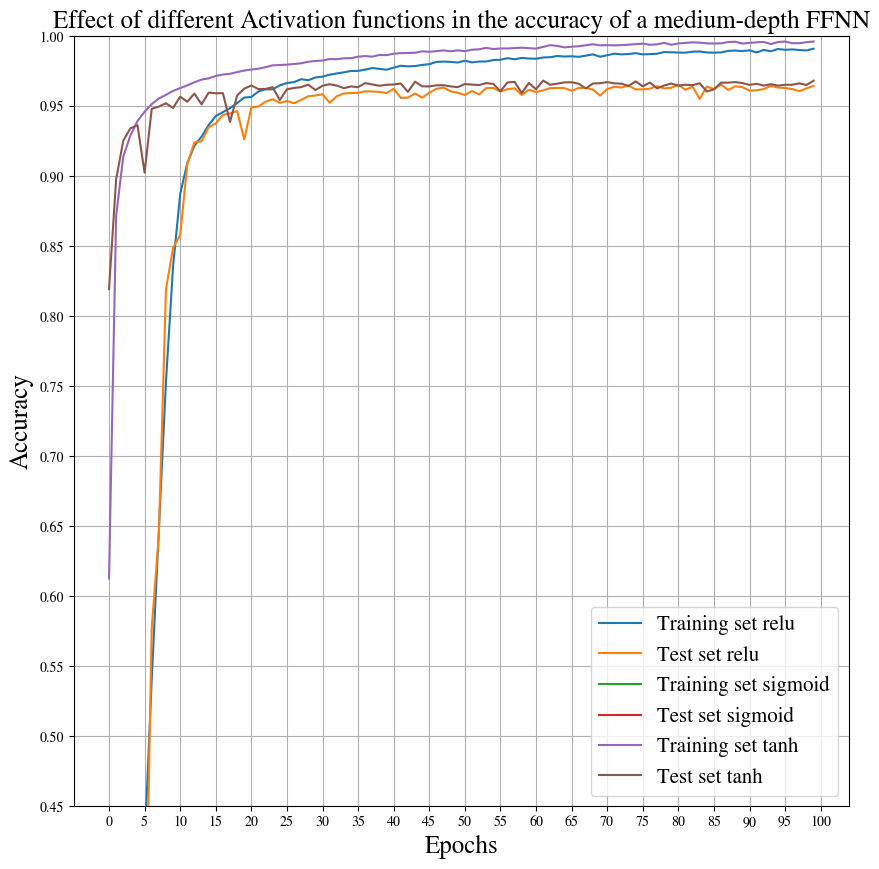

In [ ]:
plt.figure(figsize=(10,10))
for i in ["relu","sigmoid","tanh"]:
    tic = time.time()
    history = FFN_maker("20_layers_"+i, 20, (784,), i, 100, 64)
    toc = time.time()
    print("Training time for " + i +" is:",toc-tic,"seconds")
    plt.plot(history.history['categorical_accuracy'],label = "Training set " + i)
    plt.plot(history.history['val_categorical_accuracy'],label = "Test set " + i)
    plt.xlabel("Epochs",fontsize = 18)
    plt.title('Effect of different Activation functions in the accuracy of a medium-depth FFNN',fontsize = 18)
    plt.yticks(np.arange(0,1.1,0.05))
    plt.xticks(np.arange(0,105,5))
    plt.ylim([0.45, 1])
    plt.ylabel("Accuracy",fontsize = 18)
    plt.grid()
    plt.legend(fontsize = 15)

### iii) 40 Layers with *ReLU*, *Sigmoid* and *tanh*

Training time for relu is: 926.037798166275 seconds
Training time for sigmoid is: 926.1270816326141 seconds
Training time for tanh is: 886.100554227829 seconds


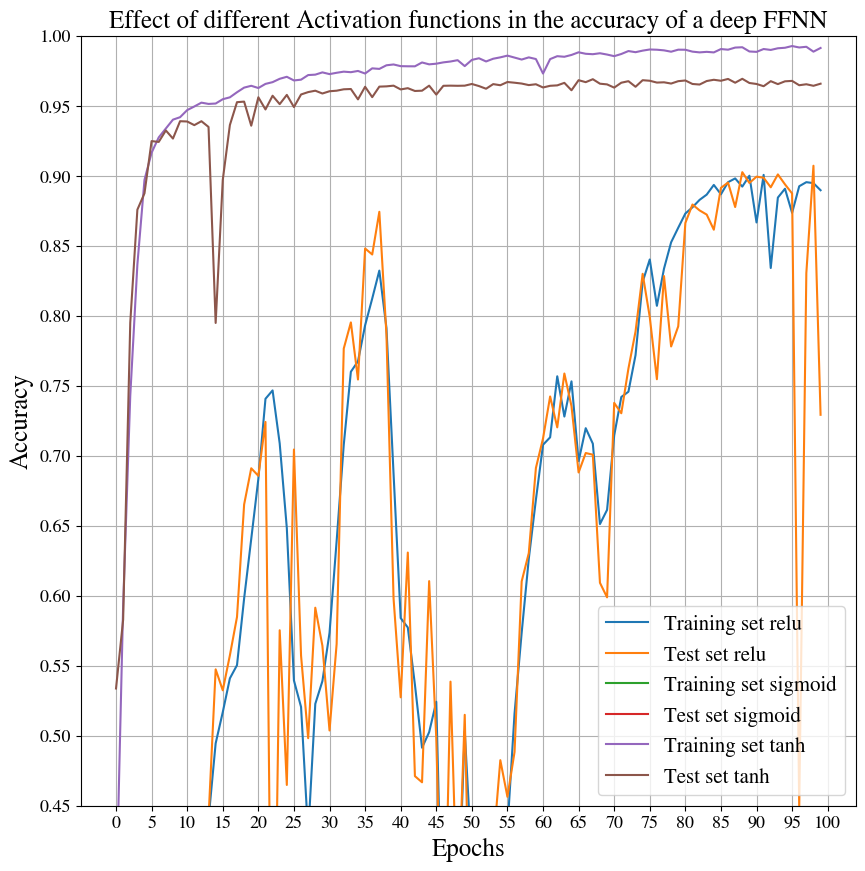

In [ ]:
plt.figure(figsize=(10,10))
for i in ["relu","sigmoid","tanh"]:
    tic = time.time()
    history = FFN_maker("40_layers_"+i, 40, (784,), i, 100, 64)
    toc = time.time()
    print("Training time for " + i +" is:",toc-tic,"seconds")
    plt.plot(history.history['categorical_accuracy'],label = "Training set " + i)
    plt.plot(history.history['val_categorical_accuracy'],label = "Test set " + i)
    plt.xlabel("Epochs", fontsize = 18)
    plt.title('Effect of different Activation functions in the accuracy of a deep FFNN',fontsize = 18)
    plt.yticks(np.arange(0,1.1,0.05),fontsize = 13)
    plt.xticks(np.arange(0,105,5),fontsize = 13)
    plt.ylim([0.45, 1])
    plt.ylabel("Accuracy", fontsize = 18)
    plt.grid()
    plt.legend(fontsize = 15)

### Comments:
For nearly all models, the `sigmoid` activation function has vanishing gradients (see **Part C**). When a neuron's activation saturates close to either zero or one, the gradient at these regions is very small to zero. During back-propagation, this local gradient will be multiplied by the gradient of the output of the whole objective. So, if a local gradient is very small, it will make the gradient to slowly vanish, and yield close to no signal.

For the case of `relu` function, although it usually avoid the vanishing gradient problem, in the 40-layer-model, its gradient also vanishes. What most likely occurred is that during training, some fragile units "died." Meaning that a big gradient flowing through a `relu` neuron cause a weight update that makes it activate on any point again. So gradients flowing through it, will always be zero from that point on. This issue can be dealt with the `Leaky relu` which introduces a small negative slope for values less than zero.

The case of `tanh` on the other hand, did considerably better than the other two as it did not suffer from a vanishing gradient. For the 20-layer model the loss increased while for the 40-layer model there intense fluctuations to boot.

---

# *Part C*
For each of the models in ***Part B***, trained for 3 epochs on the MNIST data set,
compute for each layer the maximum value of the gradient on a given mini-batch
and create a plot of layer depth vs. max gradient". Organize your plots as
a grid so that your results for the different activation functions for each depth
choice appear on the same subplot. Can you explain your observations? What
insight do you gain for the observations in ***Part B***?

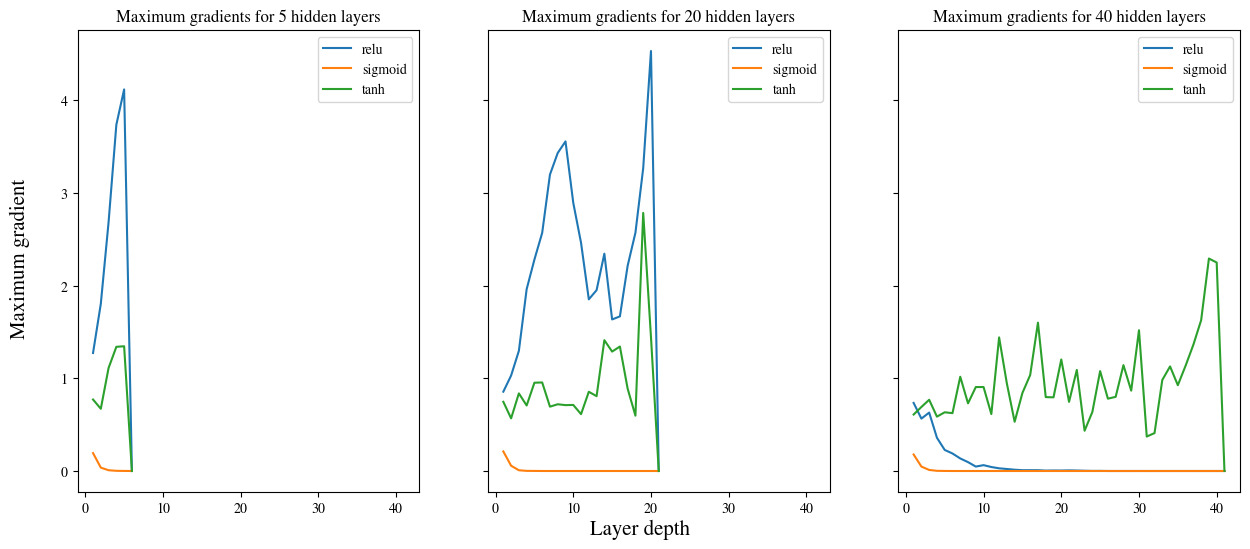

In [ ]:
# Define the number of hidden layers to use
num_layers = [5, 20, 40]

# Define the activation functions to use
activations = ['relu', 'sigmoid', 'tanh']

# Initialise subplot grid
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)

for i, n_layers in enumerate(num_layers):
    for activation in activations:
        # Define the model with the given number of hidden layers and activation function
        model = keras.Sequential()
        model.add(layers.Dense(32, input_shape=(784,), activation='relu'))
        # Hidden layers
        for j in range(n_layers):
            model.add(layers.Dense(32, activation=activation))
        model.add(layers.Dense(10, activation='softmax'))

        # Compile the model
        opt = keras.optimizers.experimental.SGD(learning_rate=0.01)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

        # Train the model
        history = model.fit(X_train_flat, y_train, epochs=3, batch_size=32, validation_data=(X_test_flat, y_test), verbose=0)

        # Compute the maximum gradient for each layer of the model for a single batch
        x_batch = X_train_flat[:32]
        x_batch = tf.cast(x_batch, dtype=tf.float32)
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(x_batch)
            x = model.layers[0](x_batch)
            outputs = []
            max_grads = []
            for layer in model.layers[1:]:
                x = layer(x)
                outputs.append(x)
                grad = tf.math.abs(tape.gradient(x, x_batch))
                max_grads.append(tf.reduce_max(grad))

        # Plot the maximum gradient for each layer against the layer number
        axs[i].plot(range(1, len(max_grads) + 1), max_grads, label=activation)

    # Add labels and legend to the plot
    axs[i].set_title('Maximum gradients for {} hidden layers'.format(n_layers))
    axs[i].legend()

# Label the horizontal and perpendicular axes
fig.text(0.5, 0.04, 'Layer depth', ha='center', fontsize=15)
fig.text(0.08, 0.5, 'Maximum gradient', va='center', rotation='vertical', fontsize=15)    
    
# Show the plot
plt.show()

### Comments:
Clearly the choice of activation function affects the maximum gradients. In general, `relu` tends to have larger gradients than `tanh`, which in turn tends to have larger gradients than `sigmoid`.

One thing that can readily be noticed is that the maximum gradients exceed the maximum values of the activation functions. Indeed, the maximum value of the derivative of the `tanh` activation function is 1. However, the maximum gradient value in some layers reaches 3-5; same applies for the `relu` function. The gradient of a layer in a neural network can exceed the activation functions' values because the gradient is a combination of the activation function derivative and the backpropagation algorithm.

In particular, during backpropagation, the gradient of the loss function with respect to the output of a layer is multiplied by the derivative of the activation function at that output. This product is then used to compute the gradient of the loss function with respect to the inputs of the layer, which is used to update the layer's weights.

If the gradient of the loss function with respect to the output of a layer is very large, then the product with the derivative of the activation function can result in a very large gradient value for that layer. This can happen if the weights of the layer are updated in a way that causes the output of the layer to be very different from the desired output.

As the number of hidden layers increases, the maximum gradients tend to become smaller in magnitude; with the exception of the `tanh` which is running amok. This is because, when using `tanh` the weights are only all decreasing or all increasing together for a given input pattern. Thus, if a weight vector must change direction it can only do so by zigzagging.

These results are indicative of the calculated accuracy values, for each epoch, in **Part B**. Meaning that when the gradients tend to zero early on, the accuracy was small and scarcely increased, while when the gradients zizaged, the loss fluctuated a lot.

---

# *Part D*
Train a model using the topology given in ***Part B*** and the activation function:

$$LeCun(x) \ = \ 1.7159 \ tanh\left(\frac{2}{3}x\right) + 0.01x$$

Compare the learning curves of the models using both *LeCun* and *Hyperbolic tangent* activation functions. Write down the backpropagation equations and the gradient range for the *LeCun* activation function. Plot the gradients for the choices of depth given above for an untrained model using *LeCun* and hyperbolic tangent activations.

In [ ]:
# Define the LeCun activation function
def LeCun(x):
    return 1.7159 * K.tanh(2*x / 3) + 0.01*x

### **i)** 5 Layers with *LeCun* and *tanh*

Training-time for LeCun is: 374.90791416168213 seconds
Training-time for tanh is: 331.5021131038666 seconds


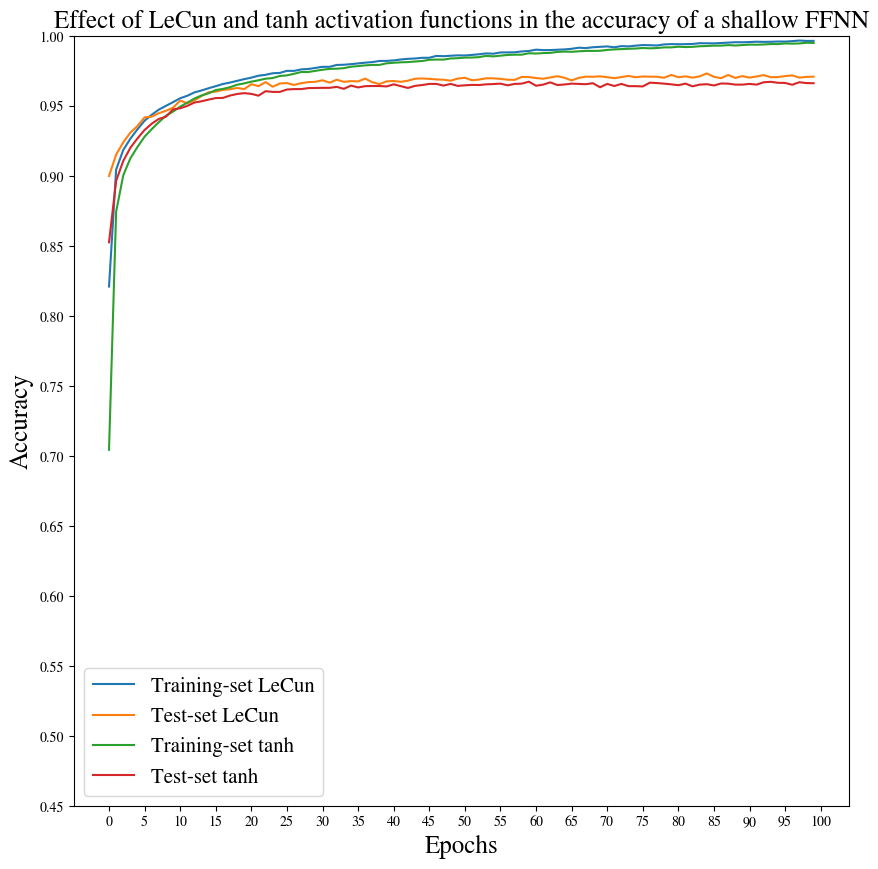

In [ ]:
plt.figure(figsize=(10, 10))
for i in [LeCun, "tanh"]:
    k = "LeCun" if i == LeCun else i
    # Model training
    tic = time.time()
    history = FFN_maker("5_layers_"+k, 5, (784,), i, 100, 64)
    toc = time.time()
    print("Training-time for " + k +" is:",toc-tic,"seconds")
    plt.plot(history.history['categorical_accuracy'], label = "Training-set " + k)
    plt.plot(history.history['val_categorical_accuracy'], label = "Test-set " + k)
    plt.xlabel("Epochs",fontsize = 18)
    plt.title("Effect of LeCun and tanh activation functions in the accuracy of a shallow FFNN",fontsize = 18)
    plt.yticks(np.arange(0,1.1,0.05))
    plt.xticks(np.arange(0,105,5))
    plt.ylim([0.45, 1])
    plt.ylabel("Accuracy",fontsize = 18)
    plt.grid()
    plt.legend(fontsize = 15)

### **ii)** 20 Layers with *LeCun* and *tanh*

Training-time for LeCun is: 806.274178981781 seconds
Training-time for tanh is: 564.2789902687073 seconds


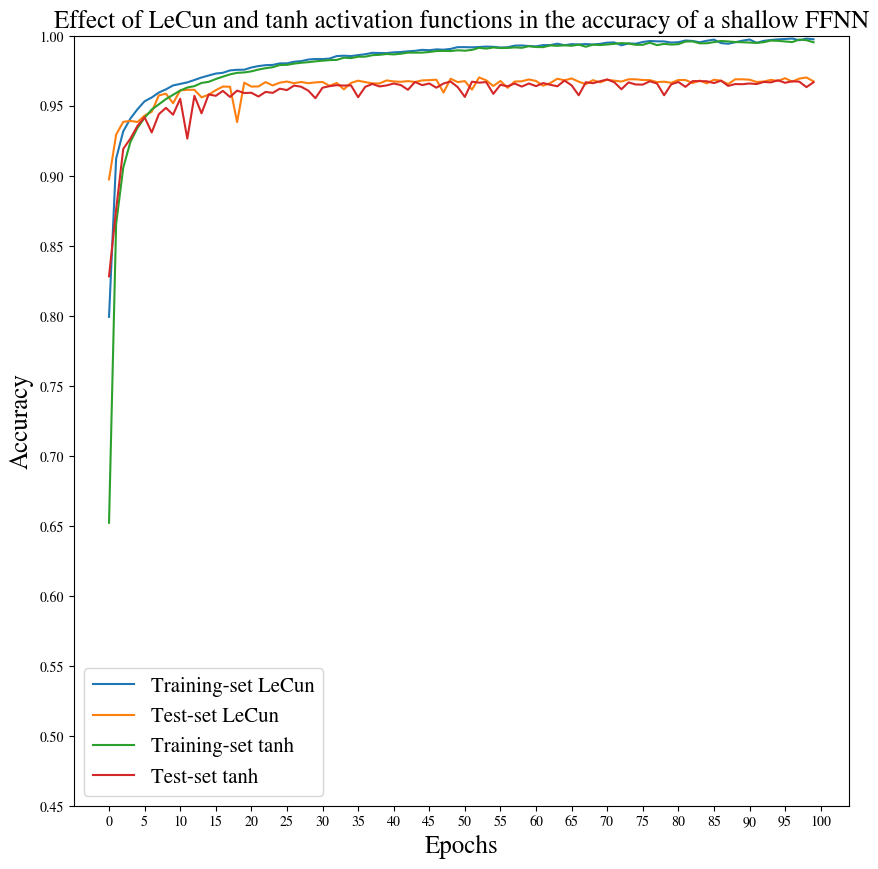

In [ ]:
plt.figure(figsize=(10, 10))
for i in [LeCun, "tanh"]:
    k = "LeCun" if i == LeCun else i
    # Model training
    tic = time.time()
    history = FFN_maker("5_layers_"+k, 20, (784,), i, 100, 64)
    toc = time.time()
    print("Training-time for " + k +" is:",toc-tic,"seconds")
    plt.plot(history.history['categorical_accuracy'], label = "Training-set " + k)
    plt.plot(history.history['val_categorical_accuracy'], label = "Test-set " + k)
    plt.xlabel("Epochs",fontsize = 18)
    plt.title("Effect of LeCun and tanh activation functions in the accuracy of a shallow FFNN",fontsize = 18)
    plt.yticks(np.arange(0,1.1,0.05))
    plt.xticks(np.arange(0,105,5))
    plt.ylim([0.45, 1])
    plt.ylabel("Accuracy",fontsize = 18)
    plt.grid()
    plt.legend(fontsize = 15)

### **iii)** 40 Layers with *LeCun* and *tanh*

Training-time for LeCun is: 1352.0273001194 seconds
Training-time for tanh is: 926.8263223171234 seconds


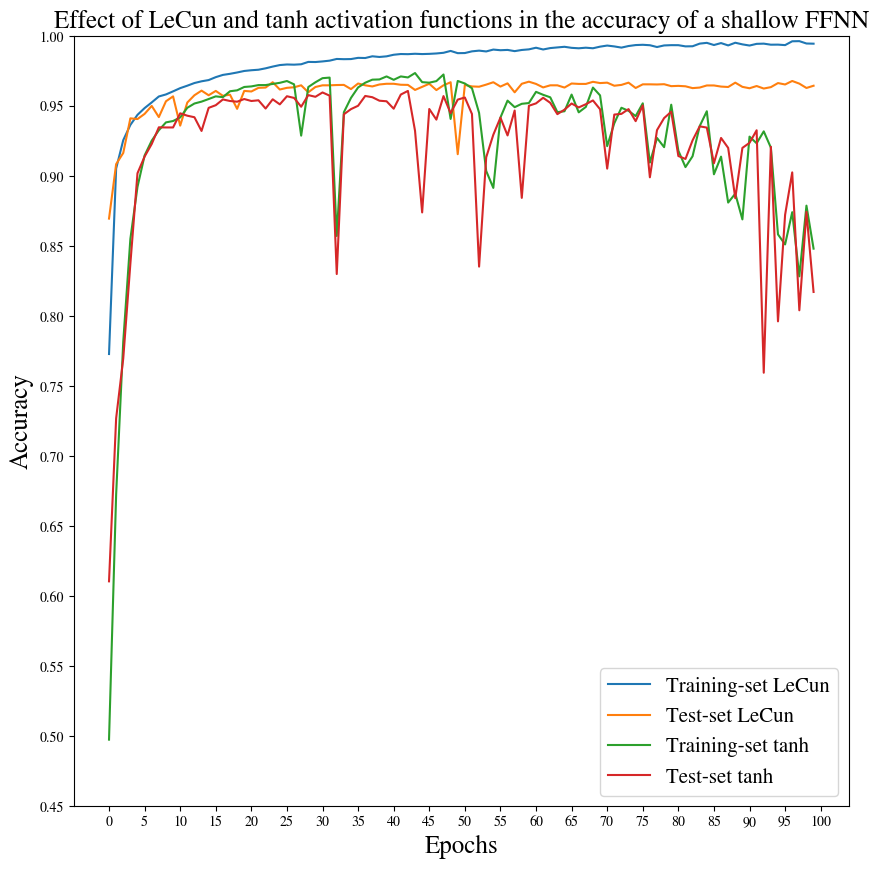

In [ ]:
plt.figure(figsize=(10, 10))
for i in [LeCun, "tanh"]:
    k = "LeCun" if i == LeCun else i
    # Model training
    tic = time.time()
    history = FFN_maker("5_layers_"+k, 40, (784,), i, 100, 64)
    toc = time.time()
    print("Training-time for " + k +" is:",toc-tic,"seconds")
    plt.plot(history.history['categorical_accuracy'], label = "Training-set " + k)
    plt.plot(history.history['val_categorical_accuracy'], label = "Test-set " + k)
    plt.xlabel("Epochs",fontsize = 18)
    plt.title("Effect of LeCun and tanh activation functions in the accuracy of a shallow FFNN",fontsize = 18)
    plt.yticks(np.arange(0,1.1,0.05))
    plt.xticks(np.arange(0,105,5))
    plt.ylim([0.45, 1])
    plt.ylabel("Accuracy",fontsize = 18)
    plt.grid()
    plt.legend(fontsize = 15)

### Comments:
Both `LeCun` and `tanh` functions behave similarly. The`LeCun`, however, is a lot more well-behaved for the 40-layer model.

The `LeCun` activation function is merely a modification of the `tanh` activation function. It forces the gradients into the most non-linear value range (see Yann LeCun's paper on Efficient Back-Prop).

## *Yann LeCun's activation function*

The LeCun activation function is defined as

$$f(v^{(r)}_{i\mu}) \ = \ 1.7159 \ tanh\left(\frac{2}{3}v^{(r)}_{i\mu}\right) + 0.01v^{(r)}_{i\mu},$$

with a derivative of

$$\begin{align}
\frac{d}{dv^{(r)}_{i\mu}}f(v^{(r)}_{i\mu}) \ &= \ \frac{d}{dv^{(r)}_{i\mu}}\left(1.7159 \ tanh\left(\frac{2}{3}v^{(r)}_{i\mu}\right) + 0.01v^{(r)}_{i\mu}\right)\\ &= \ 1.7159 \ \frac{d}{dv^{(r)}_{i\mu}}\left(tanh\left(\frac{2}{3}v^{(r)}_{i\mu}\right)\right) + 0.01\\ &= \ 1.7159 \ \frac{d}{dv^{(r)}_{i\mu}}\left(\frac{2}{3}v^{(r)}_{i\mu}\right) \frac{d}{dv^{(r)}_{i\mu}} \left(tanh\left(\frac{2}{3}v^{(r)}_{i\mu}\right)\right) + 0.01\\ &=  \ 1.7159 \ \frac{2}{3} \ \left(1 - tanh^2\left(\frac{2}{3}v^{(r)}_{i\mu}\right)\right) + 0.01 \ .
\end{align}$$

Thus, the $\delta$'s when utilising Yan LeCun's activation function are:

1. For the Final layer:

$$
\delta^{(R)} = \frac{\partial{E}}{\partial{y^{(R)}_{i\mu}}} \left(\ 1.7159 \ \frac{2}{3} \ \left(1 - tanh^2\left(\frac{2}{3}v^{(R)}_{i\mu}\right)\right) + 0.01\right).
$$ 

2. For the hidden layers:

$$
\delta^{(r)}_{i\mu} = \left(\sum_k\delta^{(r+1)}_{k\mu}w^{(r+1)}_{ki}\right)\left(\ 1.7159 \ \frac{2}{3} \ \left(1 - tanh^2\left(\frac{2}{3}v^{(r)}_{i\mu}\right)\right) + 0.01\right).
$$

### Gradient range

### Analytical derivation
Since the $tanh(x)$ activation function takes values between $(-1, 1)$ for all real numbers $x$, then $tanh^2(x)$ is always positive and between $[0, 1)$. This  means that $tanh'(x) = 1 - tanh(x)^2$ is always between $(0,1]$, therefore, the range of the gradient of $1.7159 \ tanh\left(\frac{2}{3}x\right) + 0.01x$ is the interval $\left(0.01, 1.7159\frac{2}{3} + 0.01\right]$ or $\left(0.01, \ \gtrapprox 1.1539\right]$.


### Some visual flare

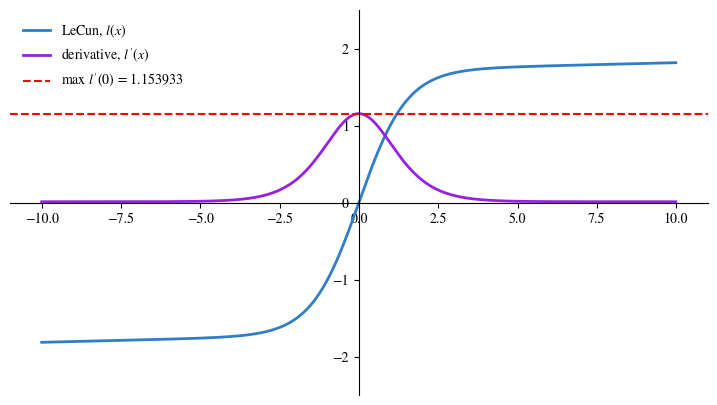

In [ ]:
def lecun(x):
    l  = 1.7159 * np.tanh((2 / 3) * x) + 0.01 * x
    dl = 1.7159 * (2 / 3) * (1 - np.tanh((2 / 3) * x) ** 2) + 0.01
    return l, dl

x = np.arange(-10, 10, 0.01)
l, dl = lecun(x)

# Find the maximum derivative value
max_dl = np.max(dl)

# Setup centered axes
fig, ax = plt.subplots(figsize = (9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')  # Shift x-axis to the origin
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Set y-axis limits
ax.set_ylim([-2.5, 2.5])

# Create and show plot
ax.plot(x, l,
        color="#307EC7", linewidth=2,
        label="LeCun, $l(x)$"
       )
ax.plot(x, dl, color="#9621E2",
        linewidth=2, label="derivative, $l'(x)$"
       )
ax.axhline(y=max_dl, color='red',
           linestyle='--',
           label=f"max $l'(0)$ = {max_dl:.6f}"
          )

ax.legend(loc="upper left", frameon=False)
fig.savefig("lecun.png", dpi=400)

plt.show()

## *Gradients of untrained models*

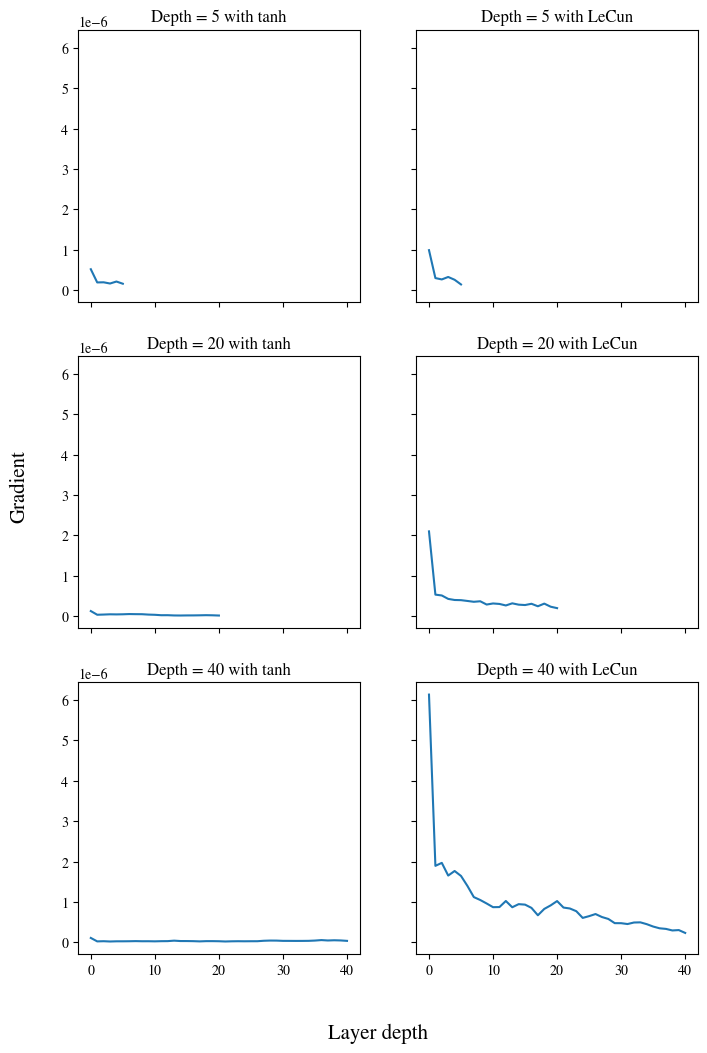

In [ ]:
# Define the number of layers to test
depths = [5, 20, 40]

# Define the batch size
batch_size = 32

# Optimiser to be used in all untrained models
opt = keras.optimizers.experimental.SGD(learning_rate=0.01)

# Create a figure with subplots for each depth and activation function
fig, axs = plt.subplots(len(depths), 2,
                        figsize=(8, 12),
                        sharex=True,
                        sharey=True
                       )

# Loop over each depth and activation function
for i, depth in enumerate(depths):
    
    # Create an untrained model with the given depth and hyperbolic tangent activation
    model_tanh = keras.Sequential()
    model_tanh.add(keras.layers.Flatten(input_shape=(784,)))
    for _ in range(depth):
        model_tanh.add(keras.layers.Dense(32, activation="tanh"))
        
    model_tanh.add(keras.layers.Dense(10, activation="softmax"))
    model_tanh.compile(optimizer = opt, 
                       loss = 'categorical_crossentropy',
                       metrics = ['categorical_accuracy']
                      )
    
    # Create an untrained model with the given depth and LeCun activation
    model_LeCun = keras.Sequential()
    model_LeCun.add(keras.layers.Flatten(input_shape=(784,)))
    for _ in range(depth):
        model_LeCun.add(keras.layers.Dense(32, activation=LeCun))
    
    model_LeCun.add(keras.layers.Dense(10, activation="softmax"))
    model_LeCun.compile(optimizer = opt, 
                        loss = 'categorical_crossentropy',
                        metrics = ['categorical_accuracy']
                       )

    # Compute the gradients for the untrained models using a mini-batch from MNIST
    x_batch = X_train_flat[:batch_size]
    x_batch = tf.cast(x_batch, dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x_batch)
        y_tanh = model_tanh(x_batch)
        y_LeCun = model_LeCun(x_batch)
        
    # Single out the weight gradients    
    grads_tanh = [tape.gradient(y_tanh, w) for w in model_tanh.trainable_variables if 'kernel' in w.name]
    grads_LeCun = [tape.gradient(y_LeCun, w) for w in model_LeCun.trainable_variables if 'kernel' in w.name]
    del tape
    
    # Plot the gradients for the hyperbolic-tangent activation
    axs[i, 0].plot([tf.norm(grad).numpy() for grad in grads_tanh])
    axs[i, 0].set_title("Depth = {} with tanh".format(depth))
    
    # Plot the gradients for the LeCun activation
    axs[i, 1].plot([tf.norm(grad).numpy() for grad in grads_LeCun])
    axs[i, 1].set_title("Depth = {} with LeCun".format(depth))

# Label the horizontal and perpendicular axes
fig.text(0.5, 0.04, 'Layer depth', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Gradient', va='center', rotation='vertical', fontsize=15)

# Show the plot
plt.show()

### Comments:
The `tf.GradientTape` function calculates both gradients of weights and biases for each layer in our untrained models. However, in this case, only the gradients of weights have been visualised (look at the list comprehensions `grads_tanh` and `grads_LeCun`).

It can be observed that in all cases we get near-to-zero gradients, which, for the aformentioned activation functions, correspond to a local minima. This is to be expected as untrained models have, as the name implies, not learned anything yet. When a model is initialized with random weights, the output of the model is also random. Consequently, the gradients of the loss function with respect to the trainable variables are also random and close to zero. As the model begins to learn during training, the gradients become non-zero, and the model starts to improve. Hence, zero gradients for an untrained model are an anticipated result.

Upon rerunning the code snippet, it is not unusual to notice inconsistencies. This can be attributed to the stochastic nature of the optimization algorithm employed in the code. Specifically, the *stochastic gradient descent* optimizer randomly samples a mini-batch of data and computes the gradients on this mini-batch. As a result, there is inherent randomness in the gradient computation. Additionally, the initial weights of the neural network are randomly initialized, further contributing to the variation in the gradient values.